ROTTEN TOMATOES MOVIES audience_rating prediction model

Question : With the given dataset, build a model to predict 'audience_rating'. Demonstrate the working of the pipeline with a notebook, also validate the model for its accuracy.

In [1303]:
#importing neccesary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [1304]:
#Loading data
data=pd.read_excel("/media/rohith/15905E2C2B6C1D69/vscode/Rotten_Tomatoes_Movies3/Rotten_Tomatoes_Movies3.xls")
data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [1305]:
data.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [1306]:
#Handling missing values
data['audience_rating'].fillna(data['audience_rating'].mean(),inplace=True)

/tmp/ipykernel_5136/755465390.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['audience_rating'].fillna(data['audience_rating'].mean(),inplace=True)


In [1307]:
#Drop irrelevant columns and handling NAN values
columns_to_drop=['movie_title','in_theaters_date','on_streaming_date','studio_name']
data.drop(columns=columns_to_drop,inplace=True)
data.dropna(inplace=True)

In [1308]:
#Encoding categorical columns
categorical_col=['rating','genre','directors','writers','cast','tomatometer_status']
label_encoders={}
for col in categorical_col:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col].astype(str))
    label_encoders[col]=le

In [1309]:
#Preprocessing text columns
data['movie_info_length']=data['movie_info'].str.len()
data['critics_consensus_length']=data['critics_consensus'].str.len()
data.drop(columns=['movie_info','critics_consensus'],inplace=True)

In [1310]:
#Separating data into features and target
x=data.drop(columns=['audience_rating'])
y=data['audience_rating']

In [1311]:
# Normalization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [1312]:
#Splitting dataset into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [1313]:
data.columns

Index(['rating', 'genre', 'directors', 'writers', 'cast', 'runtime_in_minutes',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_rating', 'movie_info_length', 'critics_consensus_length'],
      dtype='object')

In [1314]:
#preprocessing pipeline
numeric_features=x.select_dtypes(include=['float64','int64']).columns
numeric_transformer=StandardScaler()

preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features)
    ],
    remainder='passthrough' 
)

In [1315]:
#XGBRegressor model
xgb_model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=5,random_state=42))
])

In [1316]:
xgb_model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['rating', 'genre', 'directors', 'writers', 'cast', 'runtime_in_minutes',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'movie_info_length', 'critics_consensus_length'],
      dtype='object'))])),
                ('regressor',
                 XGBRegressor(base_sco...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [1317]:
y_pred=xgb_model.predict(x_test)

In [1318]:
#validation
xgb_mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {xgb_mse}")

Mean Squared Error: 157.91210231057076


In [1319]:
#Prediction Accuracy
prediction_accuracy=100-np.mean(np.abs((y_test-y_pred)/y_test))*100
print(f"Prediction Accuracy: {prediction_accuracy:.2f}%")

Prediction Accuracy: 80.23%


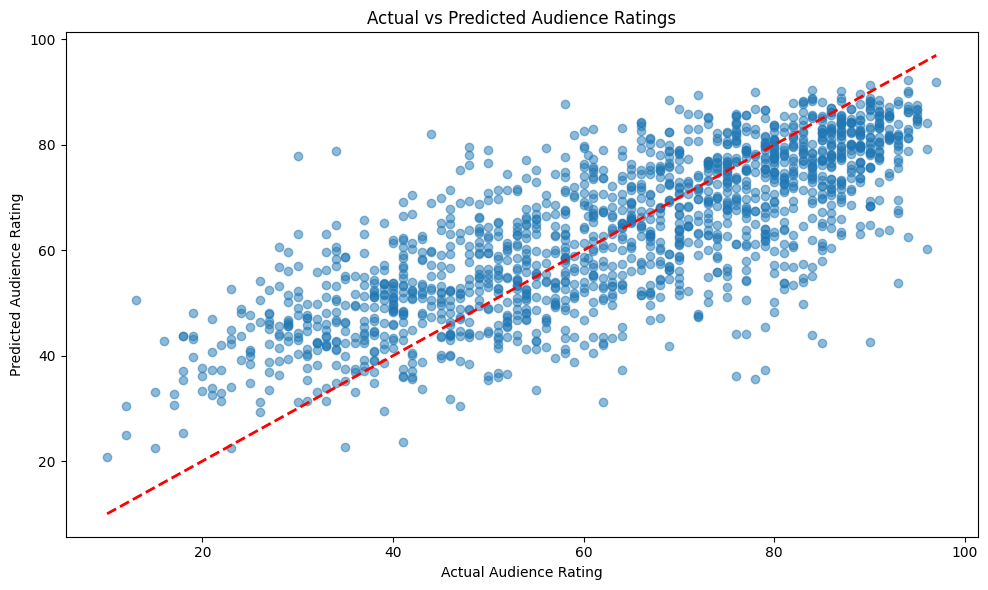

In [1320]:
#visualizing actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual Audience Rating')
plt.ylabel('Predicted Audience Rating')
plt.title('Actual vs Predicted Audience Ratings')
plt.tight_layout()
plt.show()

XGBoost Regressor VS Random Forest Regressor

In [1321]:
#Random Forest regressor model
rf_model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42))
])

In [1322]:
rf_model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['rating', 'genre', 'directors', 'writers', 'cast', 'runtime_in_minutes',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'movie_info_length', 'critics_consensus_length'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=5, random_state=42))])

In [1323]:
#training and evaluation of  RandomForest

rf_pred=rf_model.predict(x_test)
rf_mse=mean_squared_error(y_test,rf_pred)
print(f"RandomForest Mean Squared Error:{rf_mse}")

RandomForest Mean Squared Error:175.02209013943974


In [1324]:
#Comparing XGB and RF
if xgb_mse < rf_mse:
    print("XGBoost performs better")
else:
    print("RandomForest performs better")

XGBoost performs better


In [1325]:
# Prediction Accuracy
accuracy_XGB=100-np.mean(np.abs((y_test-y_pred)/y_test))*100
print(f"Prediction Accuracy of XGB: {accuracy_XGB:.2f}%")

accuracy_RF=100-np.mean(np.abs((y_test-rf_pred)/y_test))*100
print(f"Prediction Accuracy of RF: {accuracy_RF:.2f}%")

Prediction Accuracy of XGB: 80.23%
Prediction Accuracy of RF: 79.00%


In [1326]:
#save the model in .h5 format
from joblib import dump
dump(xgb_model, 'RottenTomatoes_Rating.joblib')

['RottenTomatoes_Rating.joblib']